In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cassandra-udyam21/payment_history_data.csv
/kaggle/input/cassandra-udyam21/user_data_training.csv
/kaggle/input/cassandra-udyam21/Sample Submission.csv
/kaggle/input/cassandra-udyam21/user_data_testing.csv


In [ ]:
db = pd.read_csv('/kaggle/input/cassandra-udyam21/payment_history_data.csv')
db

,id,Late_2,Late_1,Late_3,days_late_Sum,normal_payment,p_code,p_limit,last_update,curr_remaining,max_bal,recent_payment_activity
0,1485873180,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,1488748059,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,1489508238,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,2320606,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,2007111,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,1488869376,0,0,0,0,9,15,NaN,NaN,0.0,NaN,NaN
8246,3730406,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN
8247,2172577,0,0,0,0,5,13,NaN,NaN,20654.4,33315.0,NaN
8248,3730406,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN


In [ ]:
db.sort_values("last_update").groupby('id').get_group(2542835)["recent_payment_activity"]

2288    20/11/2015
1328    18/12/2015
403     19/12/2015
8249           NaN
Name: recent_payment_activity, dtype: object

In [ ]:
db.groupby('id').get_group(2172577)

,id,Late_2,Late_1,Late_3,days_late_Sum,normal_payment,p_code,p_limit,last_update,curr_remaining,max_bal,recent_payment_activity
1545,2172577,0,0,0,0,10,10,NaN,07/05/2015,3896.4,20298.0,14/03/2016
2040,2172577,0,0,0,0,15,13,NaN,31/01/2015,22891.2,41200.0,23/03/2016
2058,2172577,0,0,0,0,10,6,NaN,27/01/2015,0.0,22500.0,24/08/2015
3065,2172577,0,0,0,0,11,6,NaN,17/05/2014,0.0,16400.0,21/01/2015
3391,2172577,0,0,0,0,1,13,NaN,05/02/2014,0.0,56500.0,27/08/2015
3747,2172577,0,0,0,0,8,13,NaN,20/10/2013,0.0,47020.0,20/10/2014
8247,2172577,0,0,0,0,5,13,NaN,NaN,20654.4,33315.0,NaN


In [ ]:
df = pd.read_csv('/kaggle/input/cassandra-udyam21/user_data_training.csv')
df = df.sort_values('id')
df

,label,id,Alpha,Beta,Gamma,Delta,Epsilon,Zeta,Eta,Theta,Iota,Kappa,Lambda,omikron
322,0,1114,523,1391.0,1,1200000,2,5,-1,64,5,361026,1.000000,0.015625
695,0,83847,2615,1338.5,3,325000,2,15,5,110,5,60033,316.227766,0.027273
675,1,115753,2615,1245.5,3,77000,2,15,5,109,5,151300,244.948974,0.027523
178,0,127625,2615,1320.5,3,130000,2,15,5,85,5,60047,212.132034,0.035294
469,1,136529,2615,NaN,2,90000,2,15,5,92,5,72014,1.000000,0.021739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,1492728889,2092,NaN,2,94000,2,8,-1,113,4,72000,1.000000,0.017699
583,0,1492824607,3138,1241.0,1,74000,2,6,-1,105,3,60027,200.000000,0.009524
452,0,1492844641,3661,1268.0,3,162000,2,11,5,113,4,450081,141.421356,0.026549
712,0,1492854287,2092,NaN,2,111000,2,8,5,110,4,60091,220.868739,0.018182


In [ ]:
df_test = pd.read_csv('/kaggle/input/cassandra-udyam21/user_data_testing.csv')
df_test = df_test.sort_values('id')
df_test

,id,Alpha,Beta,Gamma,Delta,Epsilon,Zeta,Eta,Theta,Iota,Kappa,Lambda,omikron
356,1,523,1130.0,2,1000000,2,4,-1,100,5,650018,1.000000,0.020000
78,12615,1046,1349.0,1,286000,2,3,-1,80,3,361003,1.000000,0.012500
71,40811,2615,1272.5,3,70000,2,15,5,113,5,60033,167.122709,0.026549
380,65668,2615,1272.5,3,120000,1,15,5,110,5,72000,187.082869,0.027273
41,72717,2615,1326.5,3,30000,2,15,5,110,5,60005,1.000000,0.027273
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1492676578,2092,1266.5,1,191000,2,8,5,85,3,72000,1.000000,0.011765
291,1492712936,2092,1257.5,3,35000,2,8,3,112,4,72014,1.000000,0.026786
159,1492728518,2092,1241.0,1,86000,1,8,5,104,3,72000,187.082869,0.009615
363,1492742245,2092,1266.5,1,104000,2,8,-1,92,5,60036,1.000000,0.010870


In [ ]:
db.groupby("p_code").get_group(22)

## hence 1487549729 is a outlier

,id,Late_2,Late_1,Late_3,days_late_Sum,normal_payment,p_code,p_limit,last_update,curr_remaining,max_bal,recent_payment_activity
454,1490575605,0,0,0,0,1,22,NaN,05/12/2015,0.0,219256.0,09/07/2015
4740,239296,0,0,0,0,1,22,NaN,20/10/2012,0.0,136068.0,31/03/2014
4750,1487549729,1,0,0,1,35,22,275000.0,14/10/2012,0.0,52286.0,19/04/2015


In [ ]:
flag  = 0
main = db.groupby("id")
for grp in main.groups:
    ele = main.get_group(grp)["last_update"]
    if len(ele) == ele.isnull().sum():
        print("there is a problem")
        flag = 1
if flag==0:
    print("No problem go ahead")

No problem go ahead


In [ ]:
db_edit = db.copy()

In [ ]:
## as the dataframes seems to be sorted in inverse chronological order of last update and only the last 26 rows are missing using ffill is the best option

db_edit["last_update"] = db["last_update"].fillna(method="ffill")
db_edit["last_update"] = pd.to_datetime(db_edit["last_update"],format='%d/%m/%Y')
db_edit["recent_payment_activity"] = pd.to_datetime(db_edit["recent_payment_activity"],format='%d/%m/%Y')
db_edit

,id,Late_2,Late_1,Late_3,days_late_Sum,normal_payment,p_code,p_limit,last_update,curr_remaining,max_bal,recent_payment_activity
0,1485873180,0,0,0,0,1,10,16500.0,2016-12-04,0.0,NaN,NaT
1,1488748059,0,0,0,0,1,5,NaN,2016-12-04,588720.0,491100.0,NaT
2,1489508238,0,0,0,0,2,5,NaN,2016-12-04,840000.0,700500.0,2016-04-22
3,2320606,0,0,0,0,3,10,37400.0,2016-12-03,8425.2,7520.0,2016-04-25
4,2007111,0,0,0,0,2,10,NaN,2016-12-03,15147.6,NaN,2016-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,1488869376,0,0,0,0,9,15,NaN,1988-07-19,0.0,NaN,NaT
8246,3730406,0,0,0,0,1,2,NaN,1988-07-19,0.0,NaN,NaT
8247,2172577,0,0,0,0,5,13,NaN,1988-07-19,20654.4,33315.0,NaT
8248,3730406,0,0,0,0,1,2,NaN,1988-07-19,0.0,NaN,NaT


In [ ]:
"""
main = db_edit.groupby("id")
db_ediiit = db_edit.copy()
for grp in main.groups:
    ele = main.get_group(grp)
    #print(ele["recent_payment_activity"].index)
    db_ediiit["recent_payment_activity"].iloc[ele.index]=ele["recent_payment_activity"].fillna(method="bfill")
db_ediiit
"""

'\nmain = db_edit.groupby("id")\ndb_ediiit = db_edit.copy()\nfor grp in main.groups:\n    ele = main.get_group(grp)\n    #print(ele["recent_payment_activity"].index)\n    db_ediiit["recent_payment_activity"].iloc[ele.index]=ele["recent_payment_activity"].fillna(method="bfill")\ndb_ediiit\n'

In [ ]:
## only precedding value from futures are used to fill
db_edit["recent_payment_activity"] = db_edit.groupby("id")["recent_payment_activity"].ffill()
db_edit

,id,Late_2,Late_1,Late_3,days_late_Sum,normal_payment,p_code,p_limit,last_update,curr_remaining,max_bal,recent_payment_activity
0,1485873180,0,0,0,0,1,10,16500.0,2016-12-04,0.0,NaN,NaT
1,1488748059,0,0,0,0,1,5,NaN,2016-12-04,588720.0,491100.0,NaT
2,1489508238,0,0,0,0,2,5,NaN,2016-12-04,840000.0,700500.0,2016-04-22
3,2320606,0,0,0,0,3,10,37400.0,2016-12-03,8425.2,7520.0,2016-04-25
4,2007111,0,0,0,0,2,10,NaN,2016-12-03,15147.6,NaN,2016-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,1488869376,0,0,0,0,9,15,NaN,1988-07-19,0.0,NaN,2016-04-16
8246,3730406,0,0,0,0,1,2,NaN,1988-07-19,0.0,NaN,2013-07-24
8247,2172577,0,0,0,0,5,13,NaN,1988-07-19,20654.4,33315.0,2014-10-20
8248,3730406,0,0,0,0,1,2,NaN,1988-07-19,0.0,NaN,2013-07-24


In [ ]:
from datetime import timedelta

In [ ]:
db_edit["days"] = db_edit["recent_payment_activity"]-db_edit["last_update"]
db_edit["days"] = db_edit["days"].fillna(timedelta(0))
db_edit

,id,Late_2,Late_1,Late_3,days_late_Sum,normal_payment,p_code,p_limit,last_update,curr_remaining,max_bal,recent_payment_activity,days
0,1485873180,0,0,0,0,1,10,16500.0,2016-12-04,0.0,NaN,NaT,0 days
1,1488748059,0,0,0,0,1,5,NaN,2016-12-04,588720.0,491100.0,NaT,0 days
2,1489508238,0,0,0,0,2,5,NaN,2016-12-04,840000.0,700500.0,2016-04-22,-226 days
3,2320606,0,0,0,0,3,10,37400.0,2016-12-03,8425.2,7520.0,2016-04-25,-222 days
4,2007111,0,0,0,0,2,10,NaN,2016-12-03,15147.6,NaN,2016-04-26,-221 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,1488869376,0,0,0,0,9,15,NaN,1988-07-19,0.0,NaN,2016-04-16,10133 days
8246,3730406,0,0,0,0,1,2,NaN,1988-07-19,0.0,NaN,2013-07-24,9136 days
8247,2172577,0,0,0,0,5,13,NaN,1988-07-19,20654.4,33315.0,2014-10-20,9589 days
8248,3730406,0,0,0,0,1,2,NaN,1988-07-19,0.0,NaN,2013-07-24,9136 days


In [ ]:
def datetime2day(x):
    return x.days
db_edit["days_val"] = db_edit["days"].apply(datetime2day)
db_edit

,id,Late_2,Late_1,Late_3,days_late_Sum,normal_payment,p_code,p_limit,last_update,curr_remaining,max_bal,recent_payment_activity,days,days_val
0,1485873180,0,0,0,0,1,10,16500.0,2016-12-04,0.0,NaN,NaT,0 days,0
1,1488748059,0,0,0,0,1,5,NaN,2016-12-04,588720.0,491100.0,NaT,0 days,0
2,1489508238,0,0,0,0,2,5,NaN,2016-12-04,840000.0,700500.0,2016-04-22,-226 days,-226
3,2320606,0,0,0,0,3,10,37400.0,2016-12-03,8425.2,7520.0,2016-04-25,-222 days,-222
4,2007111,0,0,0,0,2,10,NaN,2016-12-03,15147.6,NaN,2016-04-26,-221 days,-221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,1488869376,0,0,0,0,9,15,NaN,1988-07-19,0.0,NaN,2016-04-16,10133 days,10133
8246,3730406,0,0,0,0,1,2,NaN,1988-07-19,0.0,NaN,2013-07-24,9136 days,9136
8247,2172577,0,0,0,0,5,13,NaN,1988-07-19,20654.4,33315.0,2014-10-20,9589 days,9589
8248,3730406,0,0,0,0,1,2,NaN,1988-07-19,0.0,NaN,2013-07-24,9136 days,9136


## Analysing variables in user data

In [ ]:
df.isnull().sum()
## got to fill only Beta

label       0
id          0
Alpha       0
Beta       94
Gamma       0
Delta       0
Epsilon     0
Zeta        0
Eta         0
Theta       0
Iota        0
Kappa       0
Lambda      0
omikron     0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

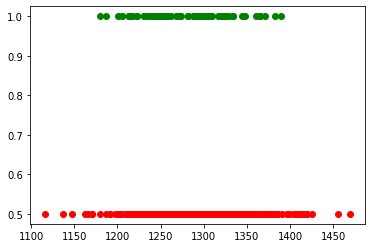

In [ ]:
t1= df.groupby("label")["Beta"].get_group(1).values
t2 = df.groupby("label")["Beta"].get_group(0).values
plt.scatter(t1,np.ones_like(t1),color='green')
plt.scatter(t2,0.5*np.ones_like(t2),color='red')
#t2.max()
plt.show()

## Average to fill nan seems to be a good option

In [ ]:
df_edit = df.copy()

In [ ]:
df_test["Beta"] = df_test["Beta"].fillna(df["Beta"].mean())
df_edit["Beta"] = df["Beta"].fillna(df["Beta"].mean())
df_edit

,label,id,Alpha,Beta,Gamma,Delta,Epsilon,Zeta,Eta,Theta,Iota,Kappa,Lambda,omikron
322,0,1114,523,1391.000000,1,1200000,2,5,-1,64,5,361026,1.000000,0.015625
695,0,83847,2615,1338.500000,3,325000,2,15,5,110,5,60033,316.227766,0.027273
675,1,115753,2615,1245.500000,3,77000,2,15,5,109,5,151300,244.948974,0.027523
178,0,127625,2615,1320.500000,3,130000,2,15,5,85,5,60047,212.132034,0.035294
469,1,136529,2615,1284.454106,2,90000,2,15,5,92,5,72014,1.000000,0.021739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,1492728889,2092,1284.454106,2,94000,2,8,-1,113,4,72000,1.000000,0.017699
583,0,1492824607,3138,1241.000000,1,74000,2,6,-1,105,3,60027,200.000000,0.009524
452,0,1492844641,3661,1268.000000,3,162000,2,11,5,113,4,450081,141.421356,0.026549
712,0,1492854287,2092,1284.454106,2,111000,2,8,5,110,4,60091,220.868739,0.018182


In [ ]:
db_edit["p_val"] = db["p_limit"].fillna(-1000) + 500*(db["p_code"]==10)
#db_edit["p_val"].iloc[4750] *= -1

## The outlier found earlier

In [ ]:
## B fill because we are storing maximum balance in history so previous records are filled
## and zero is placed in the first max_bal as assuming we open empty accounts
db_edit["max_bal"] = db_edit.groupby("id")["max_bal"].fillna(method="bfill")
db_edit["max_bal"] = db_edit["max_bal"].fillna(0)

In [ ]:
db_edit

,id,Late_2,Late_1,Late_3,days_late_Sum,normal_payment,p_code,p_limit,last_update,curr_remaining,max_bal,recent_payment_activity,days,days_val,p_val
0,1485873180,0,0,0,0,1,10,16500.0,2016-12-04,0.0,35500.0,NaT,0 days,0,17000.0
1,1488748059,0,0,0,0,1,5,NaN,2016-12-04,588720.0,491100.0,NaT,0 days,0,-1000.0
2,1489508238,0,0,0,0,2,5,NaN,2016-12-04,840000.0,700500.0,2016-04-22,-226 days,-226,-1000.0
3,2320606,0,0,0,0,3,10,37400.0,2016-12-03,8425.2,7520.0,2016-04-25,-222 days,-222,37900.0
4,2007111,0,0,0,0,2,10,NaN,2016-12-03,15147.6,12699.0,2016-04-26,-221 days,-221,-500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,1488869376,0,0,0,0,9,15,NaN,1988-07-19,0.0,0.0,2016-04-16,10133 days,10133,-1000.0
8246,3730406,0,0,0,0,1,2,NaN,1988-07-19,0.0,0.0,2013-07-24,9136 days,9136,-1000.0
8247,2172577,0,0,0,0,5,13,NaN,1988-07-19,20654.4,33315.0,2014-10-20,9589 days,9589,-1000.0
8248,3730406,0,0,0,0,1,2,NaN,1988-07-19,0.0,0.0,2013-07-24,9136 days,9136,-1000.0


In [ ]:
db_edit.groupby("id").get_group(83847)

,id,Late_2,Late_1,Late_3,days_late_Sum,normal_payment,p_code,p_limit,last_update,curr_remaining,max_bal,recent_payment_activity,days,days_val,p_val
3118,83847,0,0,0,0,19,2,NaN,2014-05-04,72666.0,79462.0,2015-09-17,501 days,501,-1000.0
3436,83847,0,0,0,0,16,10,NaN,2014-01-19,1417.2,22889.0,2015-08-08,566 days,566,-500.0
4804,83847,0,0,0,0,34,10,410300.0,2012-09-20,11510.4,12214.0,2015-09-20,1095 days,1095,410800.0
5058,83847,0,0,0,0,36,10,NaN,2012-04-30,0.0,91631.0,2015-02-07,1013 days,1013,-500.0
5748,83847,0,0,0,0,2,10,NaN,2010-06-21,0.0,1052.0,2015-02-07,1692 days,1692,-500.0
5773,83847,0,0,0,0,35,10,275000.0,2010-05-16,0.0,250500.0,2014-08-19,1556 days,1556,275500.0
6314,83847,0,0,0,0,36,2,NaN,2008-10-26,1768387.2,2057500.0,2015-09-17,2517 days,2517,-1000.0
6372,83847,1,0,0,17,6,10,NaN,2008-09-16,6264.0,400500.0,2015-09-17,2557 days,2557,-500.0
6373,83847,0,0,0,0,33,10,NaN,2008-09-16,41757.6,400500.0,2015-09-16,2556 days,2556,-500.0
6702,83847,0,0,0,0,33,1,NaN,2008-03-20,0.0,400500.0,2011-02-25,1072 days,1072,-1000.0


In [ ]:
df_edit["late1"] = 0; df_test["late1"] = 0; 
df_edit["late2"] = 0; df_test["late2"] = 0;
df_edit["late3"] = 0; df_test["late3"] = 0;


In [ ]:
## mean vs max vs sum
lt1 = db_edit.groupby("id")["Late_1"]
lt2 = db_edit.groupby("id")["Late_2"]
lt3 = db_edit.groupby("id")["Late_3"]
ltd = db_edit.groupby("id")["days_late_Sum"]
for i,ids in enumerate(df_edit["id"]):
    df_edit["late1"].iloc[i] = (lt1.get_group(ids)*ltd.get_group(ids)).mean()
    df_edit["late2"].iloc[i] = (lt2.get_group(ids)*ltd.get_group(ids)).mean()
    df_edit["late3"].iloc[i] = (lt3.get_group(ids)*ltd.get_group(ids)).mean()
    
for i,ids in enumerate(df_test["id"]):
    df_test["late1"].iloc[i] = (lt1.get_group(ids)*ltd.get_group(ids)).mean()
    df_test["late2"].iloc[i] = (lt2.get_group(ids)*ltd.get_group(ids)).mean()
    df_test["late3"].iloc[i] = (lt3.get_group(ids)*ltd.get_group(ids)).mean()
    
    


In [ ]:
db_edit.groupby("id").get_group(83847)

,id,Late_2,Late_1,Late_3,days_late_Sum,normal_payment,p_code,p_limit,last_update,curr_remaining,max_bal,recent_payment_activity,days,days_val,p_val
3118,83847,0,0,0,0,19,2,NaN,2014-05-04,72666.0,79462.0,2015-09-17,501 days,501,-1000.0
3436,83847,0,0,0,0,16,10,NaN,2014-01-19,1417.2,22889.0,2015-08-08,566 days,566,-500.0
4804,83847,0,0,0,0,34,10,410300.0,2012-09-20,11510.4,12214.0,2015-09-20,1095 days,1095,410800.0
5058,83847,0,0,0,0,36,10,NaN,2012-04-30,0.0,91631.0,2015-02-07,1013 days,1013,-500.0
5748,83847,0,0,0,0,2,10,NaN,2010-06-21,0.0,1052.0,2015-02-07,1692 days,1692,-500.0
5773,83847,0,0,0,0,35,10,275000.0,2010-05-16,0.0,250500.0,2014-08-19,1556 days,1556,275500.0
6314,83847,0,0,0,0,36,2,NaN,2008-10-26,1768387.2,2057500.0,2015-09-17,2517 days,2517,-1000.0
6372,83847,1,0,0,17,6,10,NaN,2008-09-16,6264.0,400500.0,2015-09-17,2557 days,2557,-500.0
6373,83847,0,0,0,0,33,10,NaN,2008-09-16,41757.6,400500.0,2015-09-16,2556 days,2556,-500.0
6702,83847,0,0,0,0,33,1,NaN,2008-03-20,0.0,400500.0,2011-02-25,1072 days,1072,-1000.0


In [ ]:
df_edit.groupby("label").get_group(1)

,label,id,Alpha,Beta,Gamma,Delta,Epsilon,Zeta,Eta,Theta,Iota,Kappa,Lambda,omikron,late1,late2,late3
675,1,115753,2615,1245.500000,3,77000,2,15,5,109,5,151300,244.948974,0.027523,5953.0,0.000000,77389.0
469,1,136529,2615,1284.454106,2,90000,2,15,5,92,5,72014,1.000000,0.021739,289.7,579.400000,106647.3
479,1,186614,2615,1361.000000,3,30000,1,15,5,110,5,60033,264.575131,0.027273,0.0,3.250000,0.0
410,1,448169,2615,1284.454106,2,47000,2,15,5,112,4,510037,175.826619,0.017857,599.0,306.166667,2995.0
650,1,660752,2615,1230.500000,3,35000,2,15,5,112,5,60057,1.000000,0.026786,0.0,7.600000,81368.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1,1491928642,2092,1332.500000,1,106000,2,8,5,100,3,60033,1.000000,0.010000,0.0,0.000000,0.0
201,1,1492275156,2092,1257.500000,3,105000,2,8,5,73,3,151009,1.000000,0.041096,0.0,0.000000,0.0
47,1,1492359373,2092,1272.500000,1,141000,2,8,5,110,3,151300,1.000000,0.009091,6334.0,3.800000,47505.0
643,1,1492603491,2092,1302.500000,1,239000,1,8,5,100,3,60043,380.788655,0.010000,0.0,0.000000,0.0


In [ ]:
df_edit.groupby("label").get_group(0)

,label,id,Alpha,Beta,Gamma,Delta,Epsilon,Zeta,Eta,Theta,Iota,Kappa,Lambda,omikron,late1,late2,late3
322,0,1114,523,1391.000000,1,1200000,2,5,-1,64,5,361026,1.000000,0.015625,0.000000,0.000000,0.000000
695,0,83847,2615,1338.500000,3,325000,2,15,5,110,5,60033,316.227766,0.027273,0.000000,0.772727,0.000000
178,0,127625,2615,1320.500000,3,130000,2,15,5,85,5,60047,212.132034,0.035294,0.000000,0.000000,0.000000
186,0,138013,2615,1332.500000,3,325000,2,15,5,103,5,151009,200.000000,0.029126,0.000000,0.000000,0.000000
404,0,138755,2615,1305.500000,3,157000,2,15,9,111,5,71000,249.799920,0.027027,1587.555556,291.722222,2924.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0,1492725179,2092,1356.500000,1,136000,2,8,5,74,3,72000,1.000000,0.013514,0.000000,0.000000,0.000000
583,0,1492824607,3138,1241.000000,1,74000,2,6,-1,105,3,60027,200.000000,0.009524,0.000000,0.000000,0.000000
452,0,1492844641,3661,1268.000000,3,162000,2,11,5,113,4,450081,141.421356,0.026549,0.000000,0.000000,0.000000
712,0,1492854287,2092,1284.454106,2,111000,2,8,5,110,4,60091,220.868739,0.018182,0.000000,9.333333,0.000000


In [ ]:
val = []
for ids in df.groupby("label").get_group(1).id:
    try:
        ele = db.groupby("id").get_group(ids)["p_code"].value_counts()
        #print(ele.index[0])
        val.append(ele.index[0])
    except:
        print("No 10 Key")
        
val = np.array(val)
print(sum(val==10)/len(val))

0.6434782608695652


In [ ]:
df_edit["p_code"] = 0; df_test["p_code"] = 0; 
df_edit["p_val"] = 0; df_test["p_val"] = 0;
df_edit["p_val_std"] = 0; df_test["p_val_std"] = 0;
df_edit["no_tran"] = 0; df_test["no_tran"] = 0;

In [ ]:
## mean vs max vs sum
pv = db_edit.groupby("id")["p_val"]
pc = db_edit.groupby("id")["p_code"]
pl = db_edit.groupby("id")["p_limit"]
nt = db_edit.groupby("id")
for i,ids in enumerate(df_edit["id"]):
    df_edit["p_code"].iloc[i] = pc.get_group(ids).value_counts().index[0]
    df_edit["p_val"].iloc[i] = pv.get_group(ids).mean()
    df_edit["p_val_std"].iloc[i] = pv.get_group(ids).std()
    df_edit["no_tran"].iloc[i] = len(nt.get_group(ids))
        
for i,ids in enumerate(df_test["id"]):
    df_test["p_code"].iloc[i] = pc.get_group(ids).value_counts().index[0]
    df_test["p_val"].iloc[i] = pv.get_group(ids).mean()
    df_test["p_val_std"].iloc[i] = pv.get_group(ids).std()
    df_test["no_tran"].iloc[i] = len(nt.get_group(ids))
    
    
df_test["p_val_std"] = df_test["p_val_std"].fillna(0)
df_edit["p_val_std"] = df_edit["p_val_std"].fillna(0)

In [ ]:
## Bfill for

In [ ]:
df_edit["no_pay"] = 0; df_test["no_pay"] = 0; 
df_edit["no_pay_std"] = 0; df_test["no_pay_std"] = 0;
df_edit["max_bal"] = 0; df_test["max_bal"] = 0;
df_edit["max_bal_std"] = 0; df_test["max_bal_std"] = 0;
df_edit["rem_bal"] = 0; df_test["rem_bal"] = 0;
df_edit["rem_bal_std"] = 0; df_test["rem_bal_std"] = 0;

In [ ]:
## mean vs max vs sum
nop = db_edit.groupby("id")["normal_payment"]
mb = db_edit.groupby("id")["max_bal"]
rb = db_edit.groupby("id")["curr_remaining"]
for i,ids in enumerate(df_edit["id"]):
    df_edit["no_pay"].iloc[i] = nop.get_group(ids).max()
    df_edit["no_pay_std"].iloc[i] = nop.get_group(ids).std()
    df_edit["max_bal"].iloc[i] = mb.get_group(ids).mean()
    df_edit["max_bal_std"].iloc[i] = mb.get_group(ids).std()
    df_edit["rem_bal"].iloc[i] = rb.get_group(ids).mean()
    df_edit["rem_bal_std"].iloc[i] = rb.get_group(ids).std()
    
for i,ids in enumerate(df_test["id"]):
    df_test["no_pay"].iloc[i] = nop.get_group(ids).max()
    df_test["no_pay_std"].iloc[i] = nop.get_group(ids).std()
    df_test["max_bal"].iloc[i] = mb.get_group(ids).mean()
    df_test["max_bal_std"].iloc[i] = mb.get_group(ids).std()
    df_test["rem_bal"].iloc[i] = rb.get_group(ids).mean()
    df_test["rem_bal_std"].iloc[i] = rb.get_group(ids).std()
    
    
df_test["no_pay_std"] = df_test["no_pay_std"].fillna(0)
df_edit["no_pay_std"] = df_edit["no_pay_std"].fillna(0)
df_test["max_bal_std"] = df_test["max_bal_std"].fillna(0)
df_edit["max_bal_std"] = df_edit["max_bal_std"].fillna(0)
df_test["rem_bal_std"] = df_test["rem_bal_std"].fillna(0)
df_edit["rem_bal_std"] = df_edit["rem_bal_std"].fillna(0)


df_edit["rem_bal"] = df_edit["rem_bal"].apply(lambda x: min(2500000, x))         ## binning
df_edit["rem_bal_std"] = df_edit["rem_bal_std"].apply(lambda x: min(3050000, x)) ## binning
df_edit["max_bal"] = df_edit["max_bal"].apply(lambda x: min(2.5*(10**6), x))         ## binning
df_edit["max_bal_std"] = df_edit["max_bal_std"].apply(lambda x: min(3.5*(10**6), x)) ## binning

df_test["rem_bal"] = df_test["rem_bal"].apply(lambda x: min(2500000, x))         ## binning
df_test["rem_bal_std"] = df_test["rem_bal_std"].apply(lambda x: min(3050000, x)) ## binning
df_test["max_bal"] = df_test["max_bal"].apply(lambda x: min(2.5*(10**6), x))         ## binning
df_test["max_bal_std"] = df_test["max_bal_std"].apply(lambda x: min(3.5*(10**6), x)) ## binning

In [ ]:
df_edit["dates"] = 0; df_test["dates"] = 0; 
df_edit["dates_std"] = 0; df_test["dates_std"] = 0;
df_edit["last_up"] = 0; df_test["last_up"] = 0;
df_edit["past"] = 0; df_test["past"]=0;
df_edit["amb"] = 0; df_test["amb"]=0;

In [ ]:
dv = db_edit.groupby("id")["days_val"]
lu = db_edit.groupby("id")["last_update"]
for i,ids in enumerate(df_edit["id"]):
    df_edit["dates"].iloc[i] = dv.get_group(ids).mean()
    df_edit["dates_std"].iloc[i] = dv.get_group(ids).std()
    df_edit["last_up"].iloc[i] = lu.get_group(ids).iloc[0]
    df_edit["past"].iloc[i] = (lu.get_group(ids).iloc[0] - lu.get_group(ids).iloc[-1]).days
    df_edit["amb"].iloc[i] = int((dv.get_group(ids)<0).any())
    
for i,ids in enumerate(df_test["id"]):
    df_test["dates"].iloc[i] = dv.get_group(ids).mean()
    df_test["dates_std"].iloc[i] = dv.get_group(ids).std()
    df_test["last_up"].iloc[i] = lu.get_group(ids).iloc[0]
    df_test["past"].iloc[i] = (lu.get_group(ids).iloc[0] - lu.get_group(ids).iloc[-1]).days
    df_test["amb"].iloc[i] = int((dv.get_group(ids)<0).any())
    
df_test["dates_std"] = df_test["dates_std"].fillna(0)
df_edit["dates_std"] = df_edit["dates_std"].fillna(0)


recent_most_updated = df_edit["last_up"].min()
df_test["last_up"] = df_test["last_up"].apply(lambda x : (x-recent_most_updated).days)
df_edit["last_up"] = df_edit["last_up"].apply(lambda x : (x-recent_most_updated).days)

In [ ]:
df_edit

,label,id,Alpha,Beta,Gamma,Delta,Epsilon,Zeta,Eta,Theta,...,no_pay_std,max_bal,max_bal_std,rem_bal,rem_bal_std,dates,dates_std,last_up,past,amb
322,0,1114,523,1391.000000,1,1200000,2,5,-1,64,...,14.817943,196649.285714,276735.785384,2277.771429,6023.771407,3690.428571,1765.737887,0,2924,0
695,0,83847,2615,1338.500000,3,325000,2,15,5,110,...,15.059837,186720.227273,442211.982889,86454.654545,376066.996872,1315.545455,783.557682,2876,4618,0
675,1,115753,2615,1245.500000,3,77000,2,15,5,109,...,7.141428,91298.000000,68639.620604,40112.400000,75851.355441,1774.500000,1029.476404,3148,2816,0
178,0,127625,2615,1320.500000,3,130000,2,15,5,85,...,7.778175,34626.000000,20060.619382,8752.800000,11869.211586,665.500000,453.255447,3062,668,0
469,1,136529,2615,1284.454106,2,90000,2,15,5,92,...,10.816140,60931.800000,105032.841397,49843.440000,140756.750315,929.000000,1242.147513,3344,4024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,1492728889,2092,1284.454106,2,94000,2,8,-1,113,...,3.214550,22841.000000,19227.395846,18115.200000,23163.582345,61.333333,106.232450,3791,356,0
583,0,1492824607,3138,1241.000000,1,74000,2,6,-1,105,...,8.539126,49595.750000,60696.516519,14652.300000,9007.151312,256.000000,280.795299,3638,719,0
452,0,1492844641,3661,1268.000000,3,162000,2,11,5,113,...,11.360961,50328.625000,24775.431551,13651.350000,30201.805753,533.500000,356.177724,3437,984,0
712,0,1492854287,2092,1284.454106,2,111000,2,8,5,110,...,14.730920,189248.666667,269777.221797,179909.200000,301856.158793,855.000000,462.003247,3212,798,0


In [ ]:
df_edit["amb"].value_counts()

0    597
1    118
Name: amb, dtype: int64

In [ ]:
df_edit["Zeta"] = df_edit["Zeta"].apply(lambda x : min((x-11)*(8-x)*(x-15),100))
df_test["Zeta"] = df_test["Zeta"].apply(lambda x : min((x-11)*(8-x)*(x-15),100))
df_edit["Eta"] = df_edit["Eta"].apply(lambda x : (x-5)*(x-3)*(x+1)*(x-9))
df_test["Eta"] = df_test["Eta"].apply(lambda x : (x-5)*(x-3)*(x+1)*(x-9))

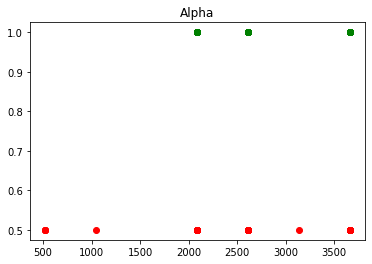

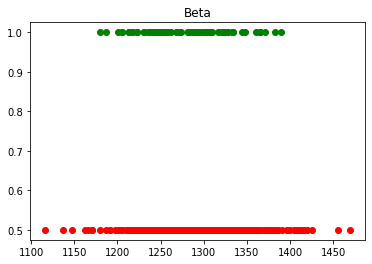

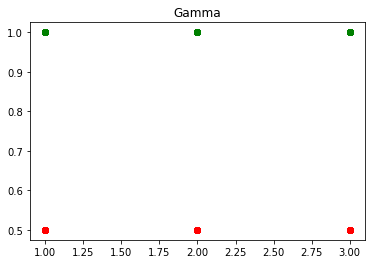

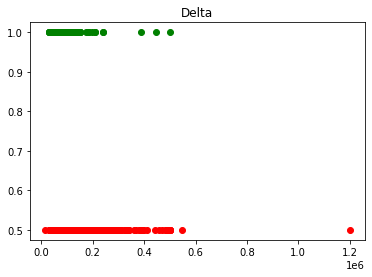

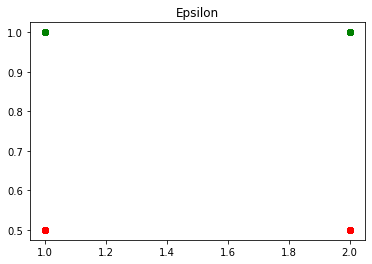

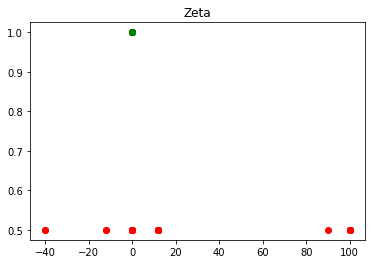

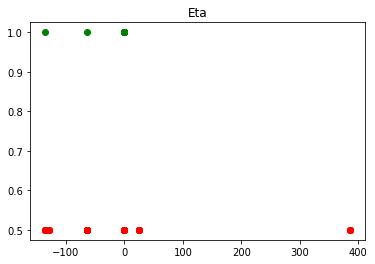

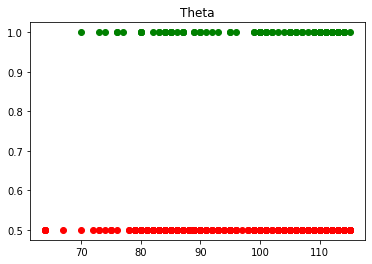

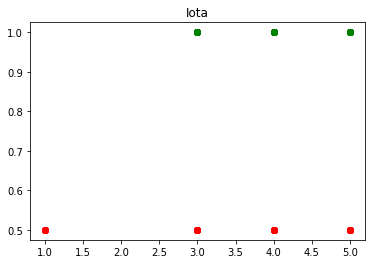

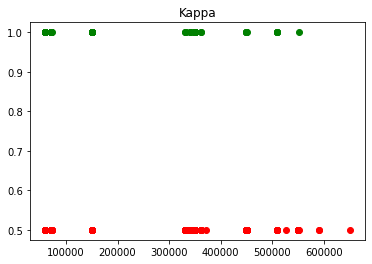

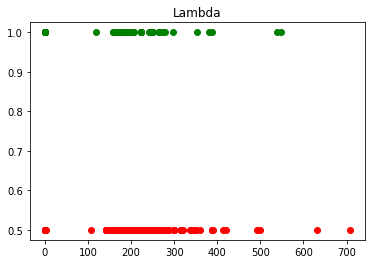

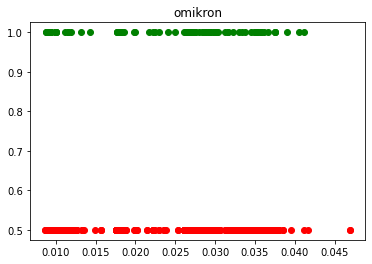

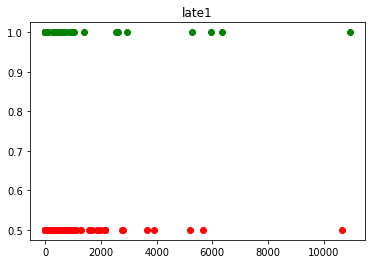

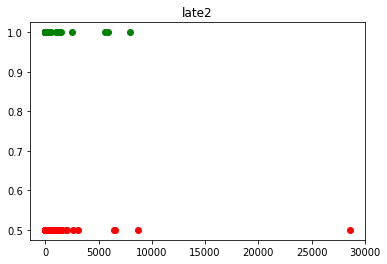

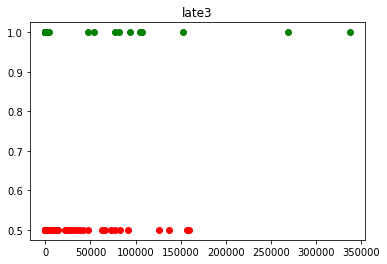

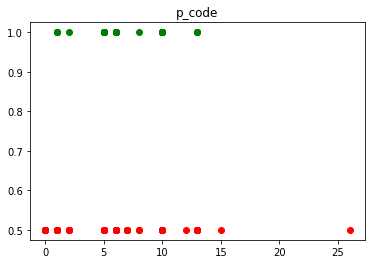

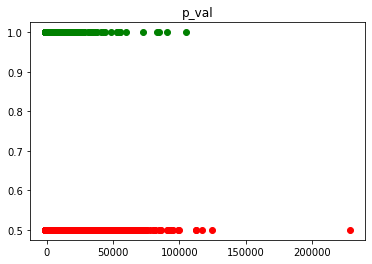

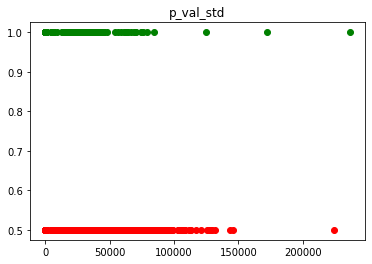

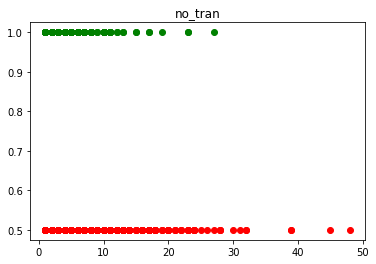

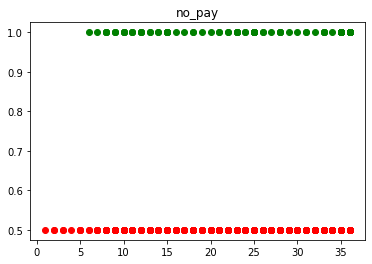

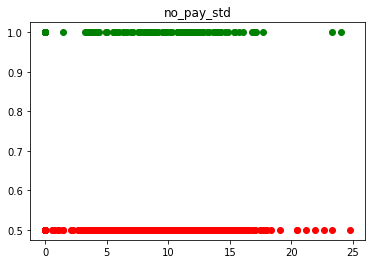

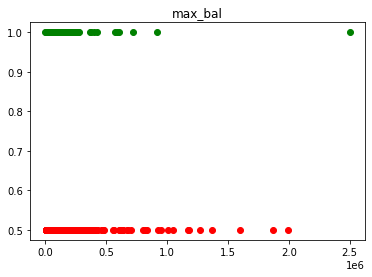

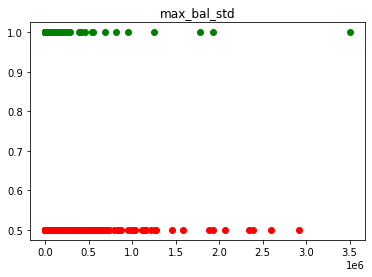

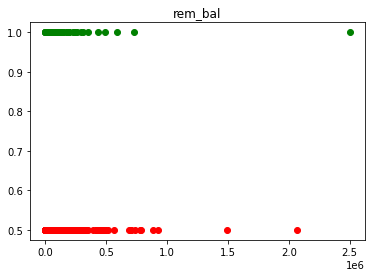

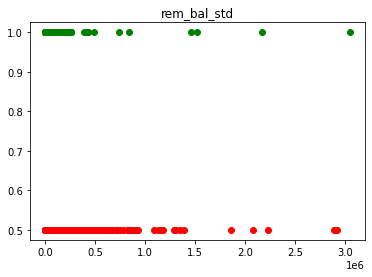

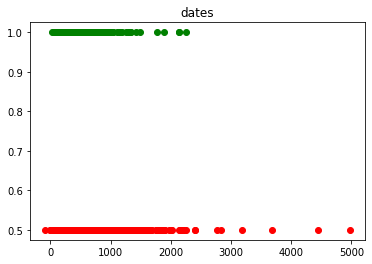

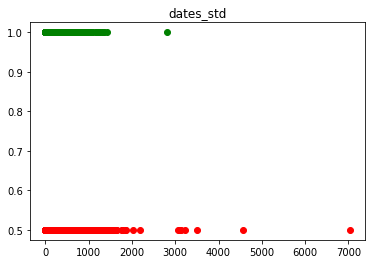

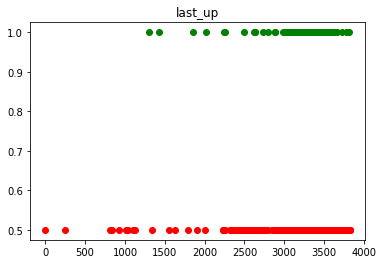

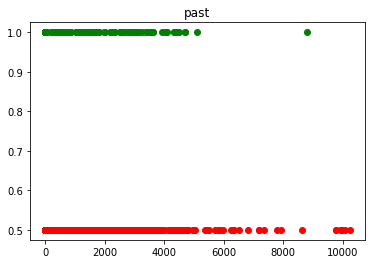

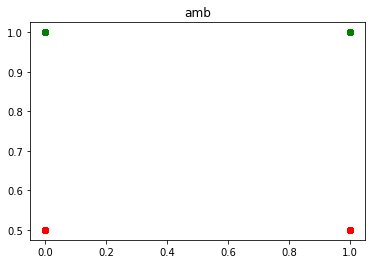

In [ ]:
for col in df_edit.columns[2:]:
    t1= df_edit.groupby("label")[col].get_group(1).values
    t2 = df_edit.groupby("label")[col].get_group(0).values
    plt.scatter(t1,np.ones_like(t1),color='green')
    plt.scatter(t2,0.5*np.ones_like(t2),color='red')
    #t2.max()
    plt.title(col)
    plt.show()

In [ ]:
df_edit.groupby("label").get_group(1)["Iota"].value_counts()

5    59
3    31
4    25
Name: Iota, dtype: int64

In [ ]:
df_final = df_edit.drop(["Beta","Epsilon","p_val_std","no_pay","no_pay_std","max_bal_std","rem_bal","rem_bal_std"],axis=1)
df_test_final = df_test.drop(["Beta","Epsilon","p_val_std","no_pay","no_pay_std","max_bal_std","rem_bal","rem_bal_std"],axis=1)

In [ ]:
df_final

,label,id,Alpha,Gamma,Delta,Zeta,Eta,Theta,Iota,Kappa,...,late3,p_code,p_val,no_tran,max_bal,dates,dates_std,last_up,past,amb
322,0,1114,523,1,1200000,100,0,64,5,361026,...,0.0,10,46428.571429,7,196649.285714,3690.428571,1765.737887,0,2924,0
695,0,83847,2615,3,325000,0,0,110,5,60033,...,0.0,10,34968.181818,22,186720.227273,1315.545455,783.557682,2876,4618,0
675,1,115753,2615,3,77000,0,0,109,5,151300,...,77389.0,10,14750.000000,4,91298.000000,1774.500000,1029.476404,3148,2816,0
178,0,127625,2615,3,130000,0,0,85,5,60047,...,0.0,10,67650.000000,2,34626.000000,665.500000,453.255447,3062,668,0
469,1,136529,2615,2,90000,0,0,92,5,72014,...,106647.3,10,7170.000000,10,60931.800000,929.000000,1242.147513,3344,4024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1,1492728889,2092,2,94000,0,0,113,4,72000,...,0.0,10,22766.666667,3,22841.000000,61.333333,106.232450,3791,356,0
583,0,1492824607,3138,1,74000,90,0,105,3,60027,...,0.0,10,14350.000000,4,49595.750000,256.000000,280.795299,3638,719,0
452,0,1492844641,3661,3,162000,0,0,113,4,450081,...,0.0,10,65725.000000,8,50328.625000,533.500000,356.177724,3437,984,0
712,0,1492854287,2092,2,111000,0,0,110,4,60091,...,0.0,10,10666.666667,3,189248.666667,855.000000,462.003247,3212,798,0


In [ ]:
df_test_final

,id,Alpha,Gamma,Delta,Zeta,Eta,Theta,Iota,Kappa,Lambda,...,late3,p_code,p_val,no_tran,max_bal,dates,dates_std,last_up,past,amb
356,1,523,2,1000000,100,0,100,5,650018,1.000000,...,61343.666667,10,86311.111111,18,222571.222222,1985.833333,2098.254099,2991,7192,1
78,12615,1046,1,286000,100,0,80,3,361003,1.000000,...,0.000000,6,39345.454545,11,238270.000000,1210.272727,1226.618367,3090,4096,0
71,40811,2615,3,70000,0,0,113,5,60033,167.122709,...,0.000000,5,-1000.000000,2,78500.000000,525.000000,29.698485,2849,801,0
380,65668,2615,3,120000,0,0,110,5,72000,187.082869,...,0.000000,10,47300.000000,4,12787.750000,365.000000,185.983870,3169,444,0
41,72717,2615,3,30000,0,0,110,5,60005,1.000000,...,0.000000,17,-1000.000000,10,671850.000000,706.500000,389.869565,3286,2694,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1492676578,2092,1,191000,0,0,85,3,72000,1.000000,...,0.000000,10,39928.571429,7,82958.857143,894.000000,883.043978,3262,2374,0
291,1492712936,2092,3,35000,0,0,112,4,72014,1.000000,...,0.000000,10,28000.000000,1,27528.000000,614.000000,0.000000,3035,0,0
159,1492728518,2092,1,86000,0,0,104,3,72000,187.082869,...,0.000000,10,49050.000000,8,108150.375000,432.125000,507.918845,3485,2150,0
363,1492742245,2092,1,104000,0,0,92,5,60036,1.000000,...,0.000000,10,52800.000000,2,18773.500000,233.500000,224.152850,3542,316,0


In [ ]:
for col in df_final.columns[2:-1]:
    df_test_final[col] = (df_test_final[col]-df_final[col].mean())/(df_final[col].max()-df_final[col].min())
    df_final[col] = (df_final[col]-df_final[col].mean())/(df_final[col].max() - df_final[col].min())

In [ ]:
Y = np.array(df_final["label"])
X = np.array(df_final.drop(["label","id"], axis=1))
X_test = np.array(df_test_final.drop(["id"],axis=1))

In [ ]:
X_edit = np.append(X[:,:-1],(X[:,:-1]**2),axis=1)
X_test_edit = np.append(X_test[:,:-1],(X_test[:,:-1]**2),axis=1)

In [ ]:
X_edit.shape

(715, 30)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=29)
X_edit = pca.fit_transform(X_edit)
X_test_edit = pca.transform(X_test_edit)
X_edit = np.append(X_edit,X[:,-1:],axis=1)
X_test_edit = np.append(X_test_edit,X_test[:,-1:],axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 0.25, k_neighbors=10)
under = RandomUnderSampler(sampling_strategy=0.3)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
train_x, train_y = over.fit_resample(X_edit, Y)

In [ ]:
train_x.shape

(750, 30)

In [ ]:
X_inliers = X_edit[Y==0]
X_outliers = X_edit[Y==1]

In [ ]:
from sklearn.ensemble import IsolationForest
ano = IsolationForest(n_estimators=100,random_state=0).fit(X_inliers)

In [ ]:
ano.predict(X_outliers)

array([-1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf_final = GradientBoostingClassifier(n_estimators=500, learning_rate=0.08, max_depth=5, subsample=0.95)
clf_final = clf_final.fit(train_x,train_y)

In [ ]:
from optuna import Trial
import optuna
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

from sklearn.model_selection import StratifiedKFold
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 5, 500)
      #criterion = trial.suggest_categorical('criterion', ["gini", "entropy"])
    max_depth = trial.suggest_int('max_depth',2, 10)
      #min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
      #min_child_weight = trial.suggest_int('min_child_weight',2,128)
      #learning_rate = trial.suggest_loguniform('learning_rate', 0.1, 1)
      #gamma = trial.suggest_int('gamma',0,10)
      #subsample = trial.suggest_loguniform('subsample', 0.5,1.0)
    est = DecisionTreeClassifier(max_depth = max_depth)
    clf = AdaBoostClassifier(base_estimator = est, n_estimators=n_estimators)
      #clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split = min_samples_split)
    skf = StratifiedKFold(n_splits=4, shuffle=True)
    errors = []
    for train_index, test_index in skf.split(train_x, train_y):
        x_train, x_test = train_x[train_index], train_x[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]
        clf.fit(x_train, y_train)
        preds = clf.predict(x_test)
        errors.append(f1_score(y_test, preds))
    return np.array(errors).mean()
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2021-04-12 06:30:49,543] A new study created in memory with name: no-name-093c5d51-82f0-4197-8a5e-da46ff86f541
[I 2021-04-12 06:30:53,015] Trial 0 finished with value: 0.3556806370346881 and parameters: {'n_estimators': 75, 'max_depth': 6}. Best is trial 0 with value: 0.3556806370346881.
[I 2021-04-12 06:30:59,877] Trial 1 finished with value: 0.37433695432985264 and parameters: {'n_estimators': 293, 'max_depth': 2}. Best is trial 1 with value: 0.37433695432985264.
[I 2021-04-12 06:31:12,640] Trial 2 finished with value: 0.40434292802713856 and parameters: {'n_estimators': 420, 'max_depth': 3}. Best is trial 2 with value: 0.40434292802713856.
[I 2021-04-12 06:31:14,637] Trial 3 finished with value: 0.3686920370962584 and parameters: {'n_estimators': 44, 'max_depth': 6}. Best is trial 2 with value: 0.40434292802713856.
[I 2021-04-12 06:31:16,317] Trial 4 finished with value: 0.3926970203285993 and parameters: {'n_estimators': 48, 'max_depth': 4}. Best is trial 2 with value: 0.4043429

In [ ]:
info = {'n_estimators': 207, 'max_depth': 4}
est = DecisionTreeClassifier(max_depth = info["max_depth"])
clf = AdaBoostClassifier(base_estimator = est, n_estimators=info["n_estimators"])
clf = clf.fit(train_x,train_y)

In [ ]:
Y_pred3 = clf.predict(X_test_edit)

In [ ]:
Y_pred = clf_final.predict_proba(X_test_edit)

In [ ]:
Y_pred1 = (Y_pred[:,1]>0.3)

In [ ]:
Y_pred2 = (Y_pred[:,1]>0.8)

In [ ]:
df_test_final

,id,Alpha,Beta,Delta,Zeta,Eta,Iota,Kappa,Lambda,late1,...,late3,p_val,no_tran,no_pay,max_bal,rem_bal,dates,last_up,past,amb
356,1,-0.762602,-0.430836,0.898034,0.986878,0.004067,0.214634,0.806874,-0.197382,-0.004763,...,0.151509,0.551793,0.199774,0.246418,0.037970,-0.015283,0.308519,-0.073865,0.516082,1
78,12615,-0.595935,0.185198,0.173161,0.986878,0.004067,-0.285366,0.317033,-0.197382,-0.009024,...,-0.007880,0.140295,0.070145,0.277668,0.044271,0.014866,0.123548,-0.048978,0.213857,0
71,40811,-0.095935,-0.029992,-0.046129,-0.013122,0.004067,0.214634,-0.193070,0.042742,-0.009024,...,-0.007880,-0.213199,-0.096522,-0.253582,-0.019850,-0.016139,-0.039889,-0.109561,-0.107795,0
380,65668,-0.095935,-0.029992,0.004633,-0.013122,0.004067,0.214634,-0.172788,0.071593,-0.009024,...,-0.007880,0.209990,-0.059485,-0.066082,-0.046223,-0.031581,-0.078049,-0.029119,-0.142645,0
41,72717,-0.095935,0.121907,-0.086738,-0.013122,0.004067,0.214634,-0.193118,-0.197382,-0.004520,...,-0.007880,-0.213199,0.051626,0.277668,0.218281,0.131830,0.003398,0.000293,0.076996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1492676578,-0.262602,-0.046870,0.076714,-0.013122,0.004067,-0.285366,-0.172788,-0.197382,-0.009024,...,-0.007880,0.145404,-0.003930,0.277668,-0.018061,-0.029703,0.048117,-0.005740,0.045758,0
291,1492712936,-0.262602,-0.072186,-0.081662,-0.013122,0.004067,-0.035366,-0.172764,-0.197382,-0.009024,...,-0.007880,0.040890,-0.115041,-0.191082,-0.040307,-0.021191,-0.018663,-0.062804,-0.185987,0
159,1492728518,-0.262602,-0.118600,-0.029885,-0.013122,0.004067,-0.285366,-0.172788,0.071593,-0.009024,...,-0.007880,0.225323,0.014589,0.277668,-0.007951,-0.024964,-0.062040,0.050318,0.023892,0
363,1492742245,-0.262602,-0.046870,-0.011611,-0.013122,0.004067,0.214634,-0.193065,-0.197382,-0.009024,...,-0.007880,0.258180,-0.096522,-0.441082,-0.043821,-0.029114,-0.109412,0.064647,-0.155140,0


In [ ]:
sample = pd.read_csv("/kaggle/input/cassandra-udyam21/Sample Submission.csv")
sample

,label,id
0,1,1484353935
1,1,1490969236
2,1,1487077817
3,1,1485622755
4,1,1486796599
...,...,...
405,1,1489702642
406,1,1835338
407,1,1236915
408,1,1489208099


In [ ]:
sample["label"].iloc[df_test_final.index] =  Y_pred1.astype(np.int32)

In [ ]:
sample

,label,id
0,0,1484353935
1,0,1490969236
2,0,1487077817
3,0,1485622755
4,1,1486796599
...,...,...
405,0,1489702642
406,0,1835338
407,0,1236915
408,0,1489208099


In [ ]:
sample["label"].iloc[74] = 0

In [ ]:
sample.to_csv("/kaggle/working/submit.csv",index=False)

In [ ]:
sample["label"].value_counts()

0    384
1     26
Name: label, dtype: int64

In [ ]:
sample.iloc[74]

label             0
id       1487549729
Name: 74, dtype: int64